In [1]:
from fairworkflows import is_fairworkflow, is_fairstep, FairStep, FairWorkflow

In [2]:
import fairworkflows

In [3]:
help (fairworkflows._version)

Help on module fairworkflows._version in fairworkflows:

NAME
    fairworkflows._version

VERSION
    0.2.6

FILE
    /usr/local/lib/python3.8/dist-packages/fairworkflows/_version.py




In [6]:
@is_fairstep(label='Convert image to grayscale')
def rgb2gray_image(image):    
    from PIL import Image
    new_image = image.convert('L')
    return new_image

In [7]:
@is_fairstep(label='Invert image')
def invert_image(image):    
    from PIL import Image, ImageOps
    im_inverted = ImageOps.invert(image.convert('RGB') ).convert('L')
    return im_inverted

In [8]:
@is_fairstep(label='Blur image')
def blur_image(image):    
    from PIL import Image, ImageFilter
    im_blurred = image.filter(ImageFilter.BLUR)
    return im_blurred

In [10]:
@is_fairstep(label='Blend two images')
def blend_image(im1, im2):    
    from PIL import Image
    im_blended= Image.blend(im1, im2, alpha=0.5)
    return im_blended

In [13]:
@is_fairstep(label='contrast image by ratio')
def contrast_image(image, ratio):    
    from PIL import Image, ImageEnhance
    new_image= image.convert('RGB')
    new_image = ImageEnhance.Contrast(image)
    new_image= new_image.enhance(ratio)
    return new_image

In [14]:
@is_fairworkflow(label='Converting an image to Pencil Sketch')
def convertim2sketch_workflow(im):
    im1 = rgb2gray_image(im)
    im2 = invert_image(im1)
    im3 = blur_image(im2)
    im4 = blend_image(im3, im1)
    im_out= contrast_image(im4, 20.5)
    return im_out

In [15]:
from PIL import Image
image = Image.open('img/puppy.png')

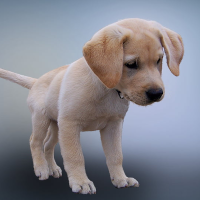

In [16]:
image

In [17]:
fw = FairWorkflow.from_function(convertim2sketch_workflow)

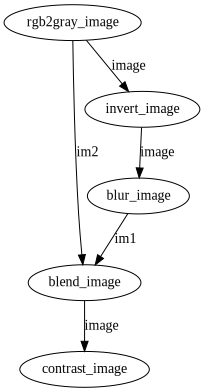

In [18]:
fw.display()

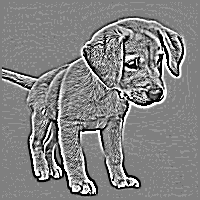

In [19]:
result, prov = fw.execute(image)
result